In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
import io
import torch 
import time
import numpy as np
from collections import OrderedDict
from matplotlib import pylab as plt

%pylab inline
rcParams["figure.figsize"] = (16,5)
sys.path.append('/home/jose/code_projects/Experimental')
sys.path.append('/home/jose/code_projects/Experimental/TTS')

import librosa
import librosa.display

from TTS.models.tacotron import Tacotron 
from TTS.layers import *
from TTS.utils.data import *
from TTS.utils.audio import AudioProcessor
from TTS.utils.generic_utils import load_config
from TTS.utils.text import text_to_sequence

import IPython
from IPython.display import Audio
from utils import *

Populating the interactive namespace from numpy and matplotlib


/home/jose/anaconda3/envs/tmpDL/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
ls /home/jose/code_projects/Experimental/TTS/checkpoints 

best_model.pth.tar         checkpoint_272976.pth.tar
checkpoint_172960.pth.tar  config.json


In [17]:
from TTS.notebooks.synthesis import create_speech, visualize

def tts(model, text, CONFIG, use_cuda, ap, figures=True):
    t_1 = time.time()
    waveform, alignment, spectrogram, stop_tokens = create_speech(model, text, CONFIG, use_cuda, ap) 
    print(" >  Run-time: {}".format(time.time() - t_1))
    if figures:                                                                                                         
        visualize(alignment, spectrogram, stop_tokens, CONFIG)                                                                       
    IPython.display.display(Audio(waveform, rate=CONFIG.sample_rate))  
    return alignment, spectrogram, stop_tokens

In [10]:
# Set constants
ROOT_PATH = '/home/jose/code_projects/Experimental/TTS'
MODEL_PATH = ROOT_PATH + '/checkpoints/best_model.pth.tar'
CONFIG_PATH = ROOT_PATH + '/checkpoints/config.json'
OUT_FOLDER = ROOT_PATH + '/test/'
CONFIG = load_config(CONFIG_PATH)
use_cuda = True

In [15]:
# load the model
model = Tacotron(CONFIG.embedding_size, CONFIG.num_freq, CONFIG.num_mels, CONFIG.r)

# load model state
if use_cuda:
    cp = torch.load(MODEL_PATH)
else:
    cp = torch.load(MODEL_PATH, map_location=lambda storage, loc: storage)

# load the model
model.load_state_dict(cp['model'])
if use_cuda:
    model.cuda()
model.eval()


# load the audio processor
ap = AudioProcessor(CONFIG.sample_rate, CONFIG.num_mels, CONFIG.min_level_db,
                    CONFIG.frame_shift_ms, CONFIG.frame_length_ms, CONFIG.ref_level_db,
                    CONFIG.num_freq, CONFIG.power, CONFIG.preemphasis, griffin_lim_iters=30)         



 | > Number of characters : 149
{'batch_size': 32,
 'checkpoint': True,
 'data_path': '/run/shm/erogol/LJSpeech-1.0',
 'embedding_size': 256,
 'epochs': 1000,
 'eval_batch_size': 32,
 'frame_length_ms': 50,
 'frame_shift_ms': 12.5,
 'griffin_lim_iters': 60,
 'lr': 0.002,
 'min_level_db': -100,
 'min_seq_len': 0,
 'model_name': 'best-model',
 'num_freq': 1025,
 'num_loader_workers': 8,
 'num_mels': 80,
 'output_path': '/data/shared/erogol_models/',
 'power': 1.5,
 'preemphasis': 0.97,
 'r': 5,
 'ref_level_db': 20,
 'sample_rate': 20000,
 'save_step': 376,
 'text_cleaner': 'english_cleaners',
 'warmup_steps': 4000}
 > Setting up Audio Processor...
 | > fft size: 2048, hop length: 250, win length: 1000


### EXAMPLES FROM TRAINING SET

In [8]:
import pandas as pd
df = pd.read_csv('/data/shared/KeithIto/LJSpeech-1.0/metadata_val.csv', delimiter='|')

Olenuska how are you today?
 >  Run-time: 0.762505292892456


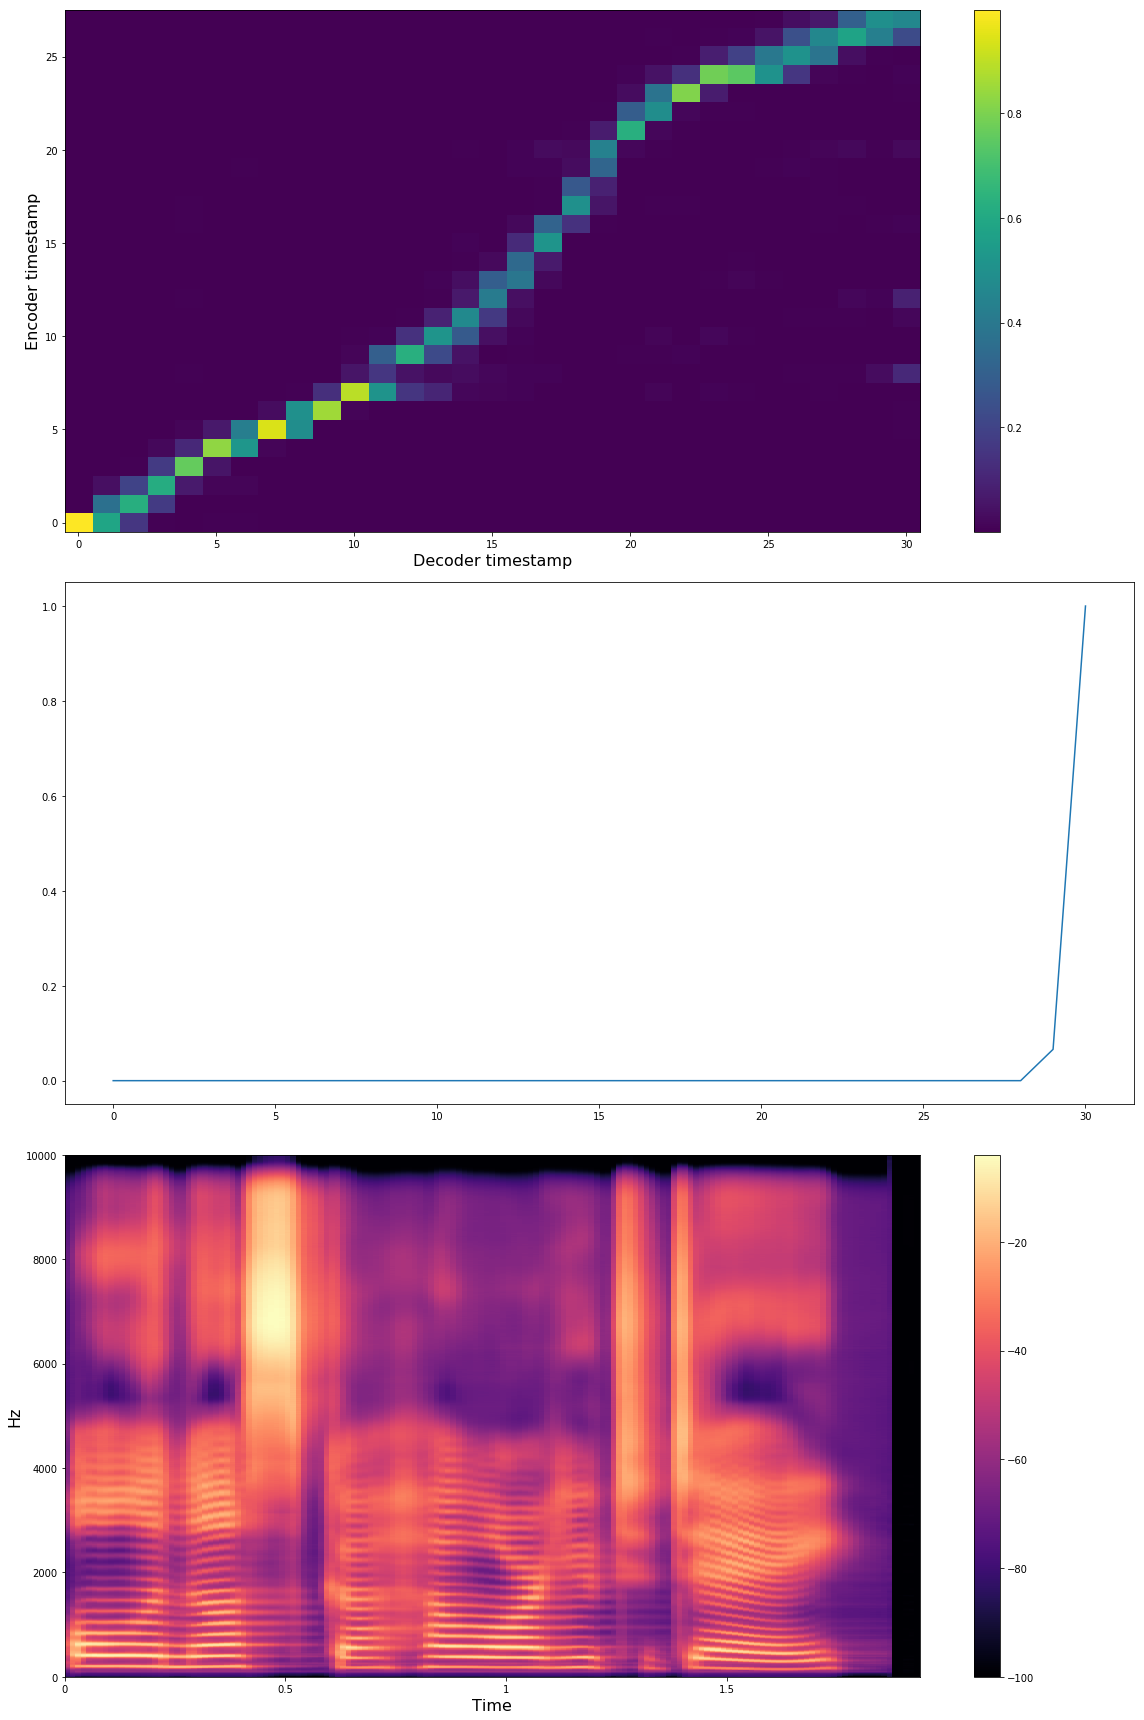

In [21]:
# sentence = df.iloc[175, 1]
sentence = "Olenuska how are you today?" 
print(sentence)
model.decoder.max_decoder_steps = 250
align, spec, stop_tokens = tts(model, sentence, CONFIG, use_cuda, ap)

### Comparision with https://mycroft.ai/blog/available-voices/

 >  Run-time: 2.287445068359375


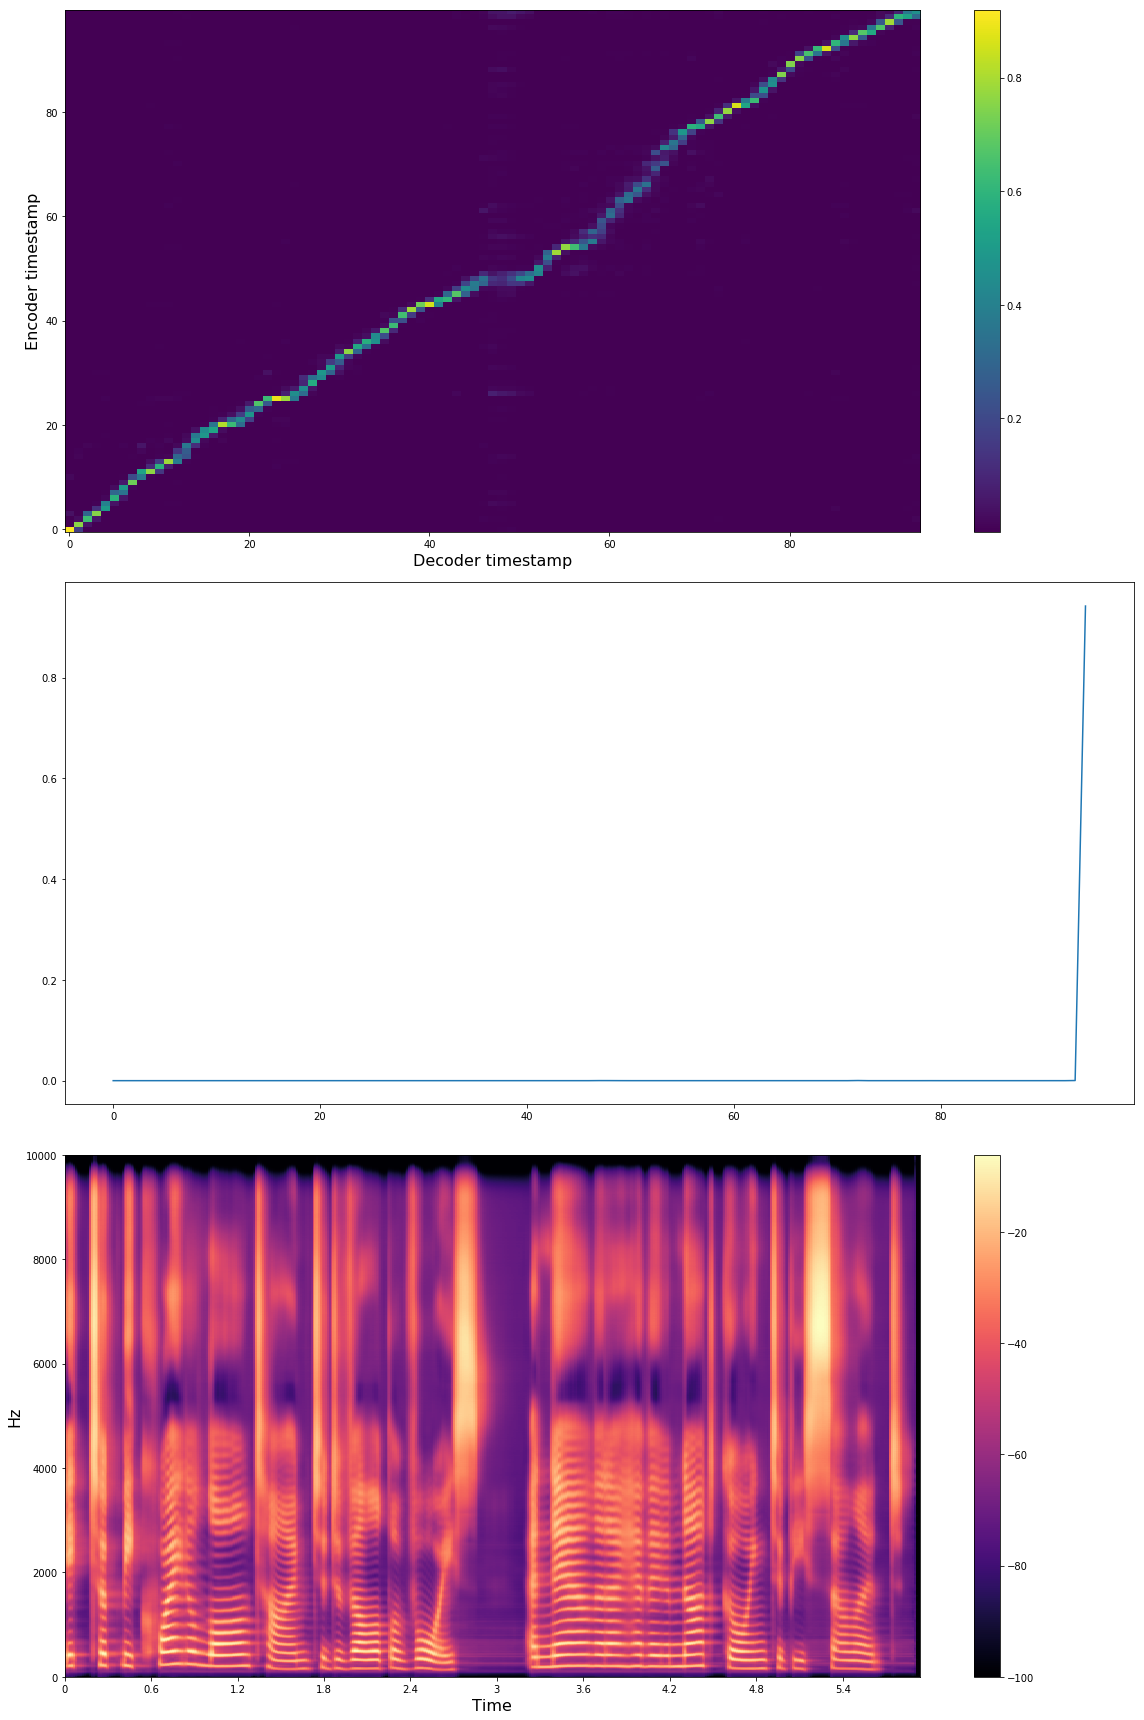

In [22]:
sentence =  "It took me quite a long time to develop a voice, and now that I have it I'm not going to be silent."
model.decoder.max_decoder_steps = 250
align, spec, stop_tokens = tts(model, sentence, CONFIG, use_cuda, ap, figures=True)

 >  Run-time: 1.3593213558197021


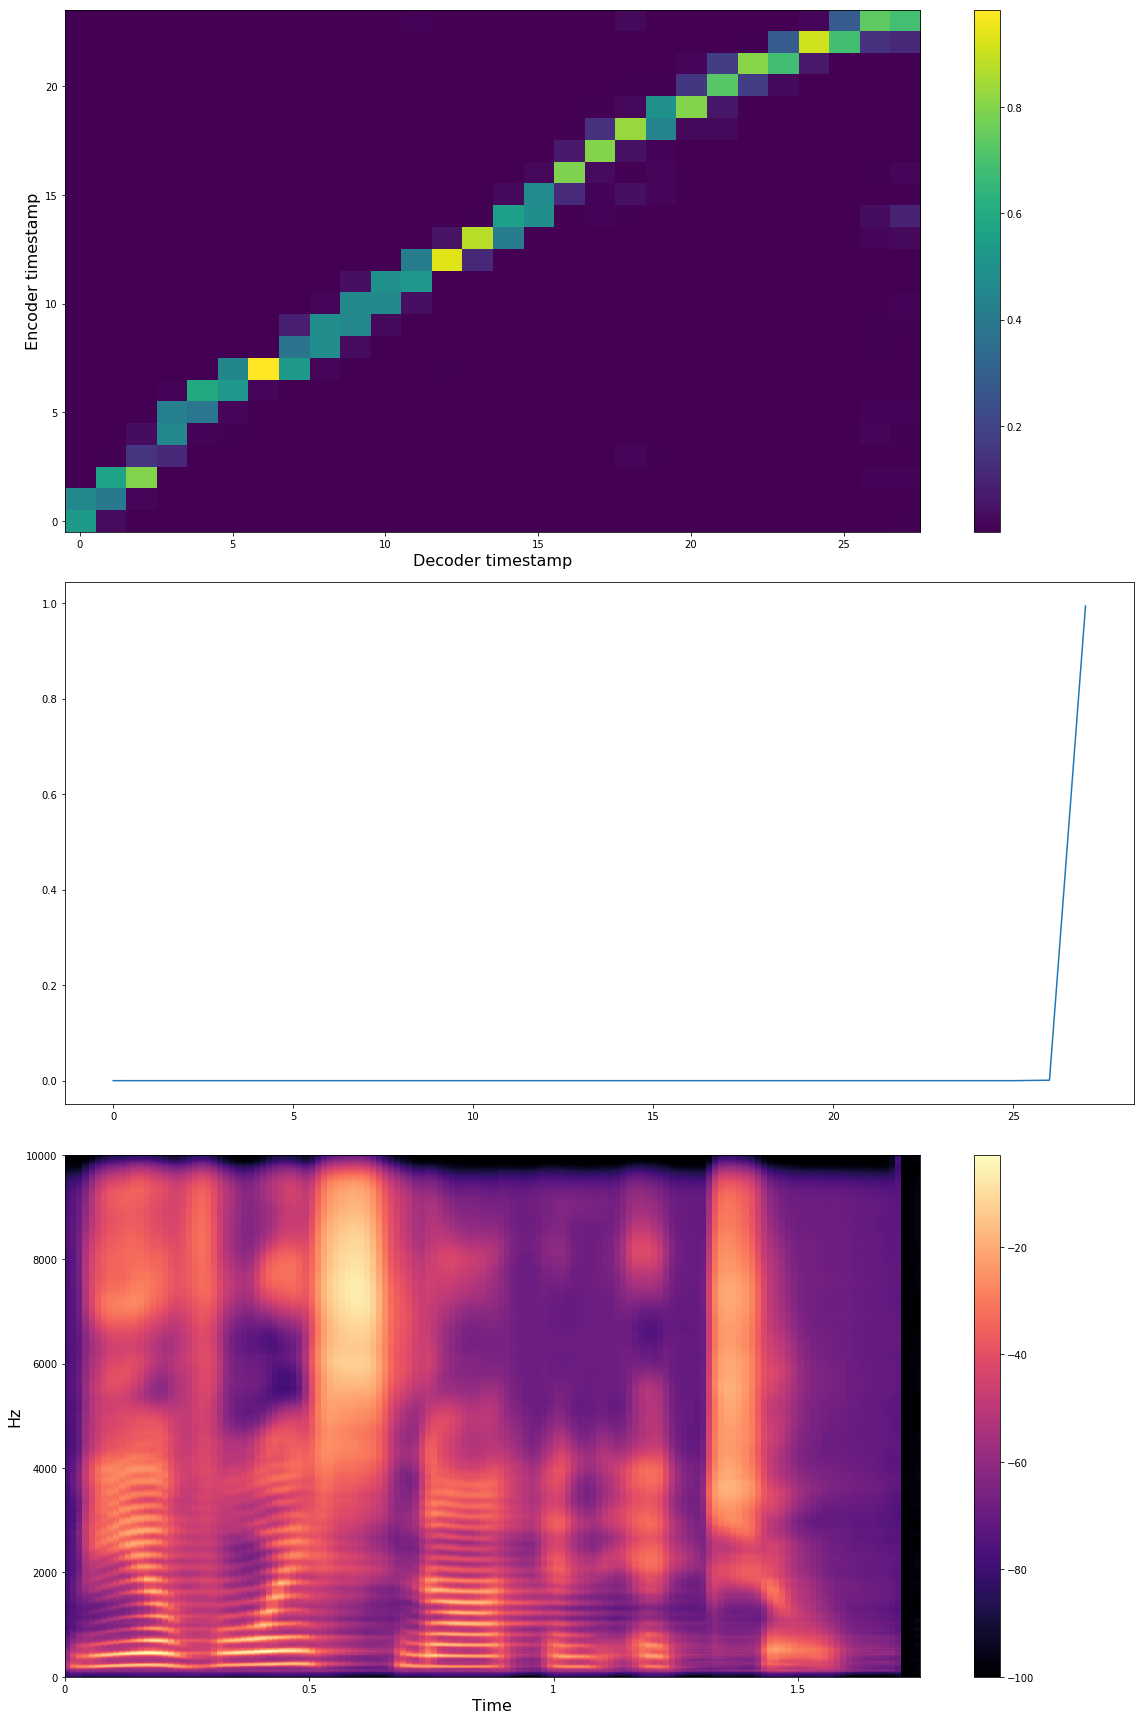

In [11]:
sentence = "Be a voice,not an echo."  # 'echo' is not in training set. 
align, spec, stop_tokens = tts(model, sentence, CONFIG, use_cuda, ap)

 >  Run-time: 3.3218443393707275


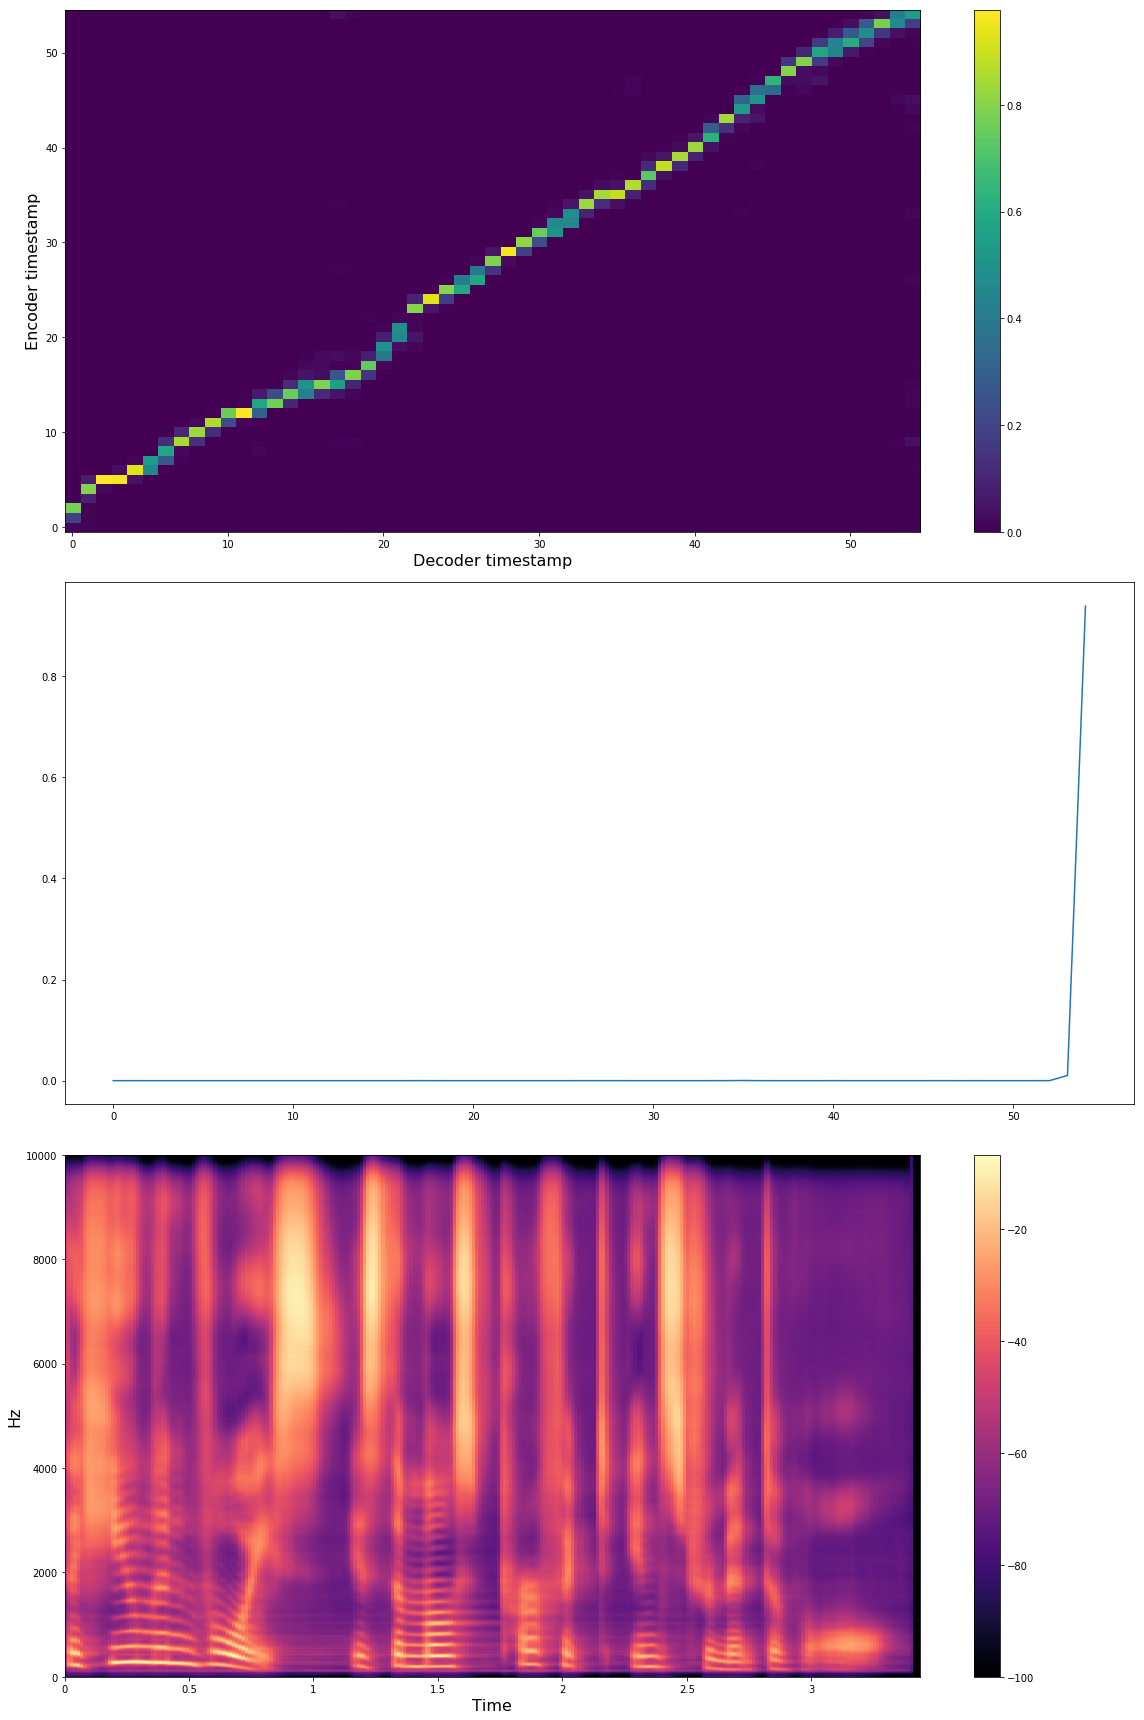

In [12]:
sentence = "The human voice is the most perfect instrument of all."
align, spec, stop_tokens = tts(model, sentence, CONFIG, use_cuda, ap)

 >  Run-time: 3.3077054023742676


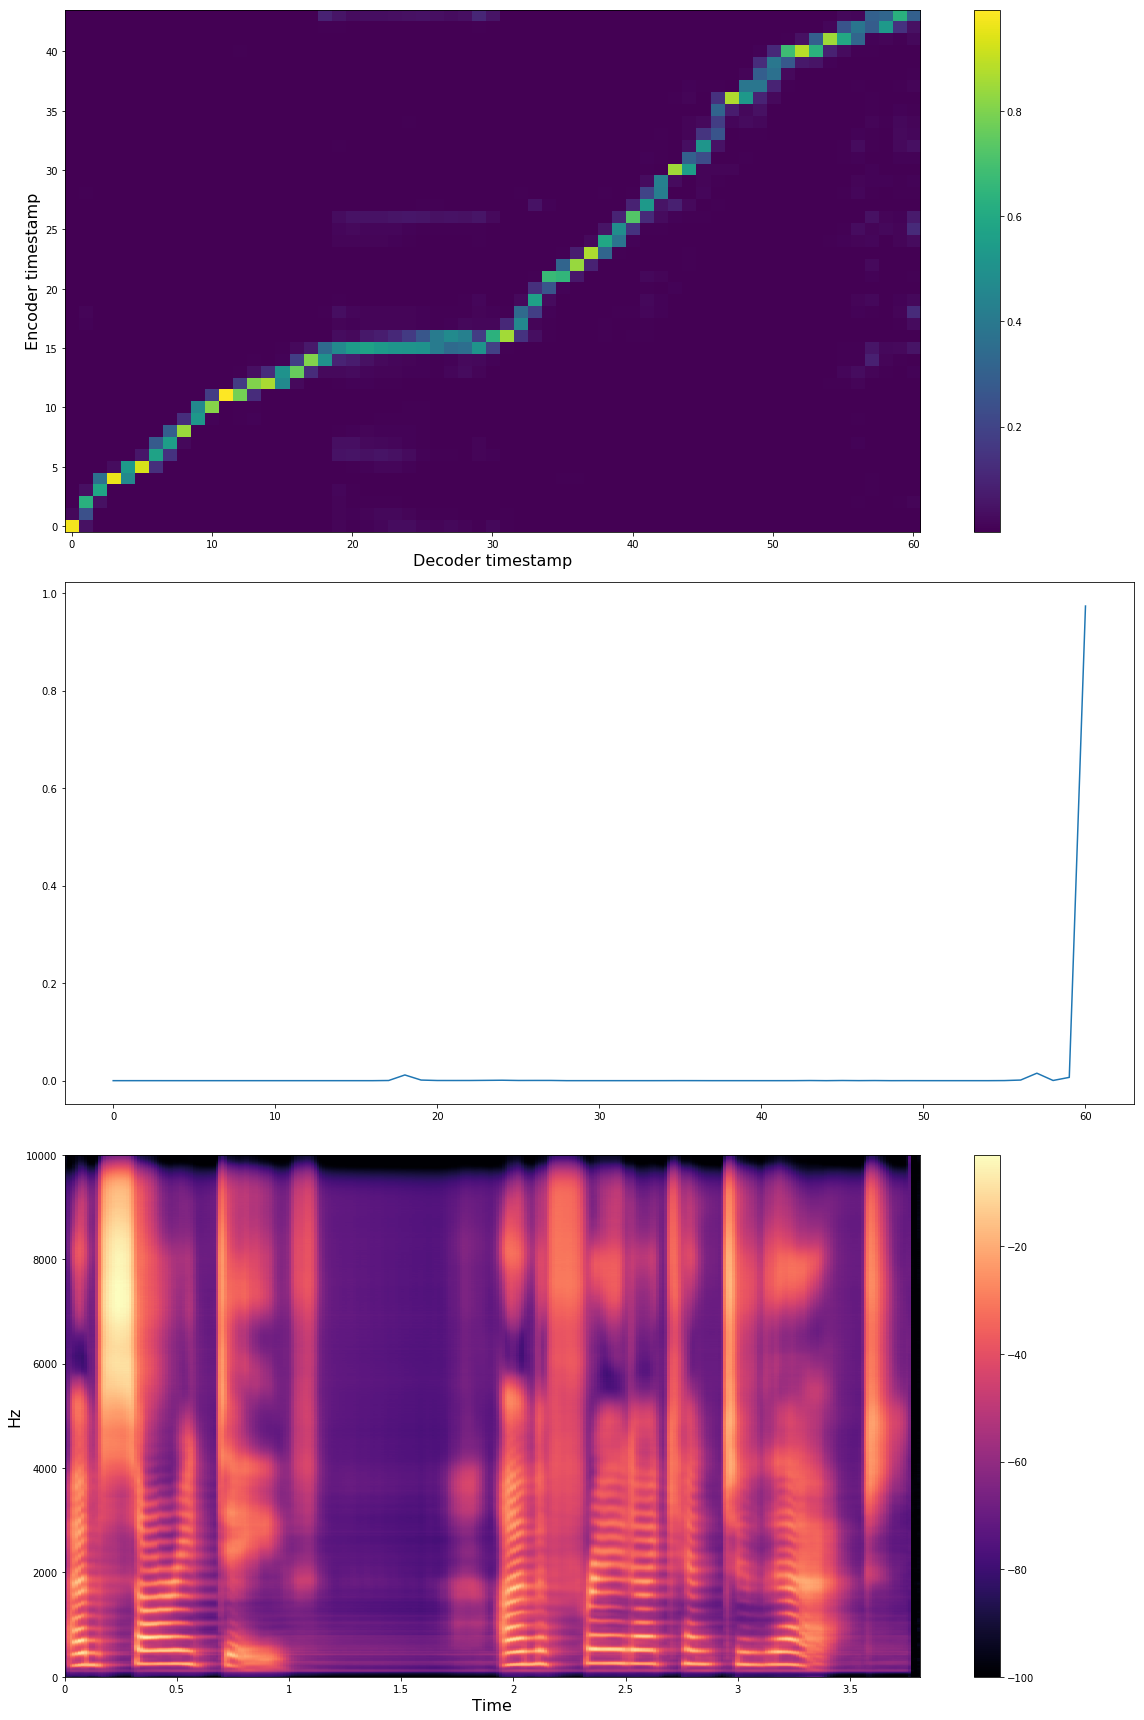

In [13]:
sentence = "I'm sorry Dave. I'm afraid I can't do that."
align, spec, stop_tokens = tts(model, sentence, CONFIG, use_cuda, ap)

In [ ]:
sentence = "This cake is great. It's so delicious and moist."
align, spec, stop_tokens = tts(model, sentence, CONFIG, use_cuda, ap)

 >  Run-time: 3.859889507293701


### Comparison with https://keithito.github.io/audio-samples/

In [23]:
sentence = "Generative adversarial network or variational auto-encoder."
align, spec, stop_tokens = tts(model, sentence, CONFIG, use_cuda, ap)

RuntimeError: cuda runtime error (4) : unspecified launch failure at /pytorch/aten/src/THC/generic/THCTensorCopy.cpp:21

In [ ]:
sentence = "Scientists at the CERN laboratory say they have discovered a new particle."
align, spec, stop_tokens = tts(model, sentence, CONFIG, use_cuda, ap)

In [ ]:
sentence = "here’s a way to measure the acute emotional intelligence that has never gone out of style."
align, spec, stop_tokens = tts(model, sentence, CONFIG, use_cuda, ap)

In [ ]:
sentence = "President Trump met with other leaders at the Group of 20 conference."
align, spec, stop_tokens = tts(model, sentence, CONFIG, use_cuda, ap)

In [ ]:
sentence = "The buses aren't the problem, they actually provide a solution."
align, spec, stop_tokens = tts(model, sentence, CONFIG, use_cuda, ap)